# **PCA: Visualize human faces**
dataset: https://www.kaggle.com/c/facial-keypoints-detection/data

* author: Prasert Kanawattanachai
* YouTube: https://www.youtube.com/prasertcbs
* Chulalongkorn Business School

In [1]:
from IPython.display import YouTubeVideo
# YouTubeVideo('', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [4]:
pd.Timestamp.now()

Timestamp('2021-05-10 09:42:04.506361')

## **read faces data**

In [5]:
# df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/face_recog_10faces.csv')
# file_name='1783_faces.csv.zip'
file_name='1000_faces.csv.zip'
url=f'https://github.com/prasertcbs/basic-dataset/raw/master/{file_name}'
df=pd.read_csv(url)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9176,9177,9178,9179,9180,9181,9182,9183,9184,9185,9186,9187,9188,9189,9190,9191,9192,9193,9194,9195,9196,9197,9198,9199,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,182,183,182,182,180,180,176,169,156,137,124,103,79,62,54,56,58,48,49,45,39,37,42,43,52,61,78,93,104,107,114,115,117,122,120,122,118,114,115,118,...,104,106,108,105,90,79,75,59,47,38,21,8,25,76,107,124,61,10,19,7,1,0,2,10,14,16,24,29,24,16,6,14,28,28,24,18,12,8,5,5
1,76,87,81,72,65,59,64,76,69,42,31,38,49,58,58,47,37,33,32,33,35,50,55,54,50,51,61,78,92,100,101,79,55,47,52,50,47,39,38,52,...,86,86,83,83,77,80,77,77,80,88,91,88,81,79,83,83,87,90,95,98,102,104,98,77,37,41,120,156,154,157,156,152,162,169,168,159,191,228,211,168
2,177,176,174,170,169,169,168,166,166,166,161,140,69,5,1,2,1,18,61,96,110,122,129,129,127,125,125,119,112,110,111,107,102,102,99,96,98,95,91,90,...,98,99,93,89,110,135,131,125,122,122,120,110,97,88,56,12,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,176,174,174,175,174,174,176,176,175,171,165,157,143,134,134,137,138,137,135,135,134,137,135,128,128,129,122,110,107,112,115,123,134,147,151,151,152,155,157,160,...,187,183,183,187,194,202,201,194,189,183,174,160,147,138,135,135,138,142,143,140,133,131,139,141,143,144,143,144,145,144,144,143,141,142,143,142,142,142,142,140
4,50,47,44,101,144,149,120,58,48,42,35,35,37,39,38,36,34,31,31,32,32,34,34,34,35,33,32,30,31,33,33,31,33,35,35,35,33,34,34,31,...,73,72,75,77,74,74,74,71,69,72,73,71,73,75,75,79,79,77,76,75,80,85,60,178,255,252,254,254,254,254,254,254,254,253,255,236,174,175,175,165


In [6]:
# df=df.Image.str.split(' ', expand=True).astype(int)
# df[:1000].to_csv('1000_faces.csv', index=False)

In [7]:
X=df.to_numpy()
X

array([[182, 183, 182, ...,   8,   5,   5],
       [ 76,  87,  81, ..., 228, 211, 168],
       [177, 176, 174, ...,   1,   1,   1],
       ...,
       [ 56,  57,  55, ...,  70,  71,  72],
       [ 54,  26,  16, ..., 191, 146,  48],
       [ 70,  67,  62, ...,  50,  39,  42]])

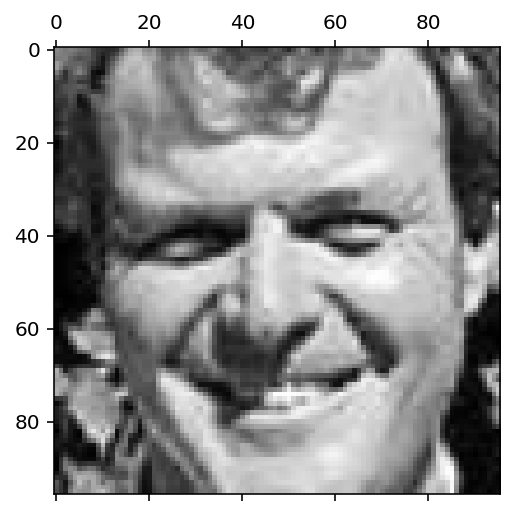

In [8]:
n=np.random.randint(0, X.shape[0])
plt.matshow(X[n].reshape(96, -1), cmap='gray')

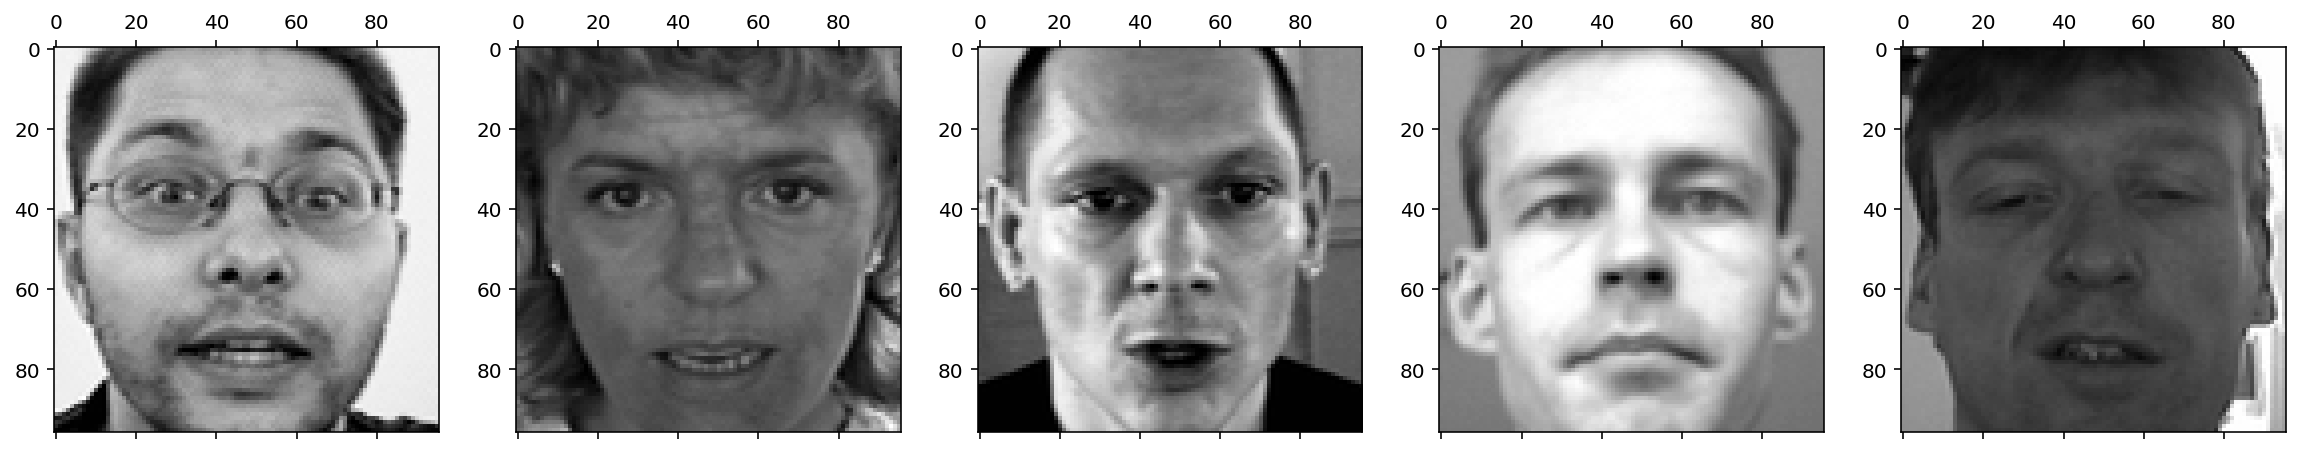

In [9]:
n=5
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(X[i].reshape(96, -1), cmap='gray') for i in range(n)];

## **Principal Component Analysis (PCA)**

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **standardized data (mean=0, sd=1)**

In [11]:
X_train = df.to_numpy()
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_t = scaler.transform(X_train)

In [12]:
X_train.shape

(1000, 9216)

In [13]:
# If 0 < n_components < 1 and svd_solver == 'full', 
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.95)

pca.fit(X_train_t)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.n_components_

172

In [15]:
X_train_t = pca.transform(X_train_t) # Apply dimensionality reduction to X_train_t

In [16]:
X_train_t.shape

(1000, 172)

In [17]:
pca.components_.shape

(172, 9216)

In [18]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

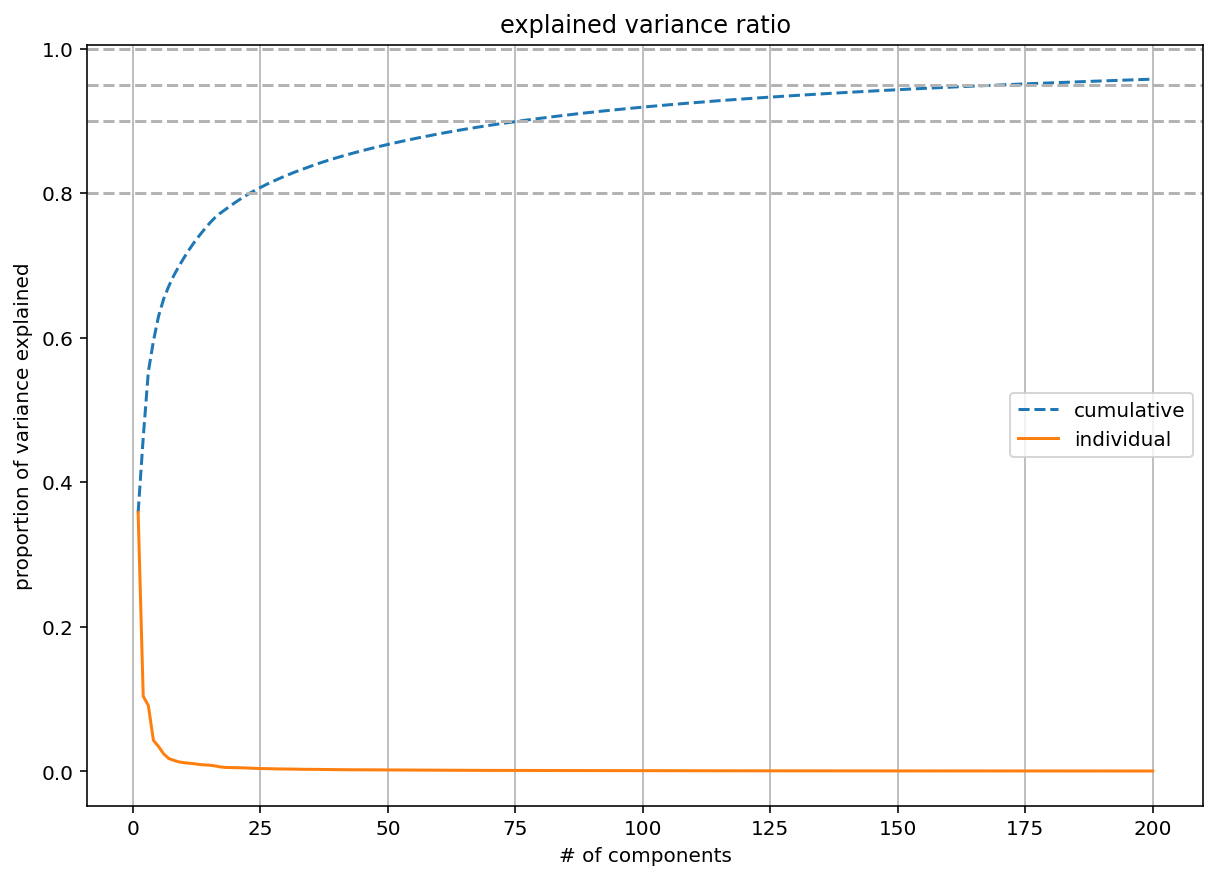

In [19]:
scree_plot(X_train, 200, True, False)

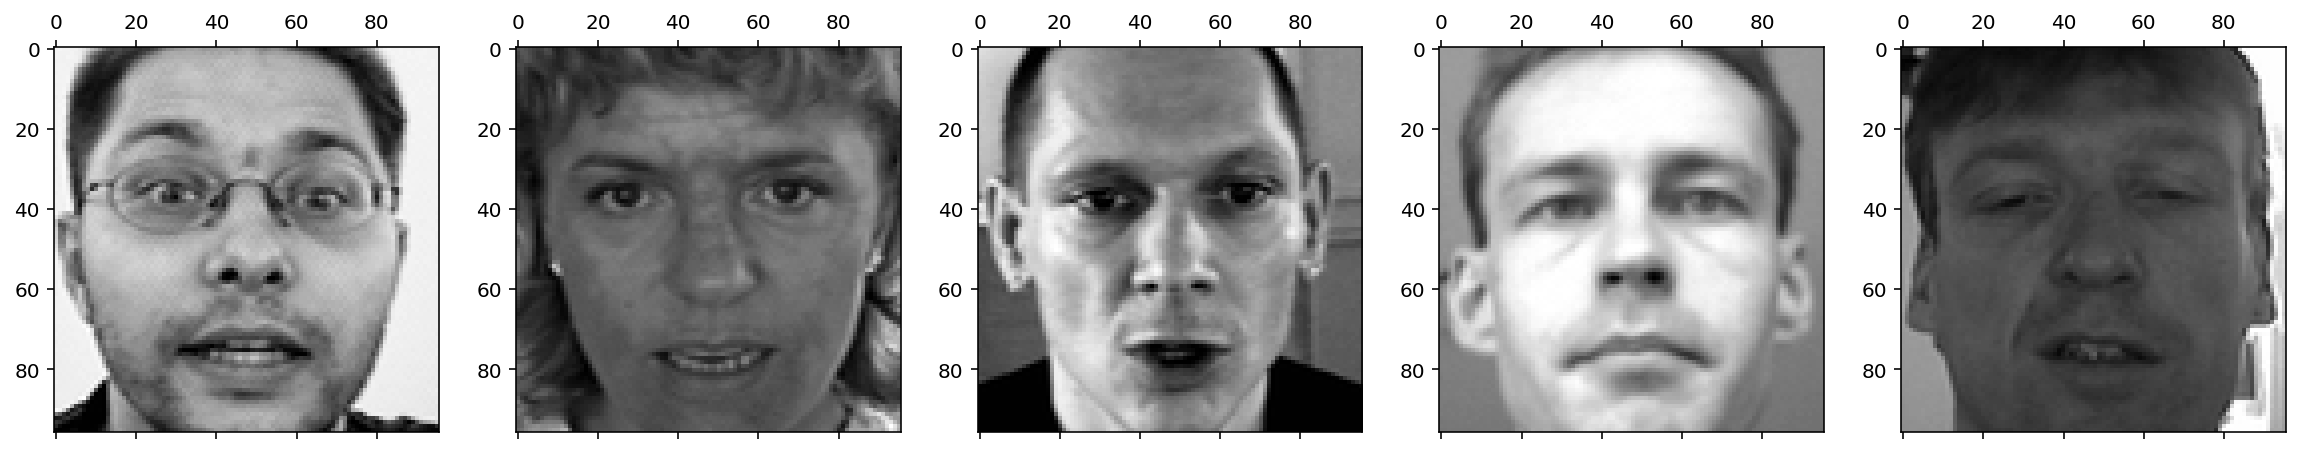

In [20]:
XT=X_train # original X_train
n=5
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(XT[i].reshape(96, -1), cmap='gray') for i in range(n)];

In [21]:
# X_train_t (Apply dimensionality reduction) %*% pca.components_
XP=np.dot(X_train_t, pca.components_).round(4) # pca.transform(X)
print(XP)
print(XP.shape)

[[ 1.4388  1.3651  1.3416 ... -0.7116 -0.5733 -0.5412]
 [-0.244  -0.3244 -0.4417 ...  1.0079  1.0445  0.8522]
 [ 0.5882  0.6779  0.7297 ... -1.4034 -1.4056 -1.5783]
 ...
 [-0.7947 -0.8023 -0.7045 ... -0.2573 -0.2362 -0.2507]
 [-0.8663 -0.9362 -1.052  ...  0.1947  0.153   0.0655]
 [-0.4588 -0.5369 -0.5747 ... -0.4644 -0.5467 -0.631 ]]
(1000, 9216)


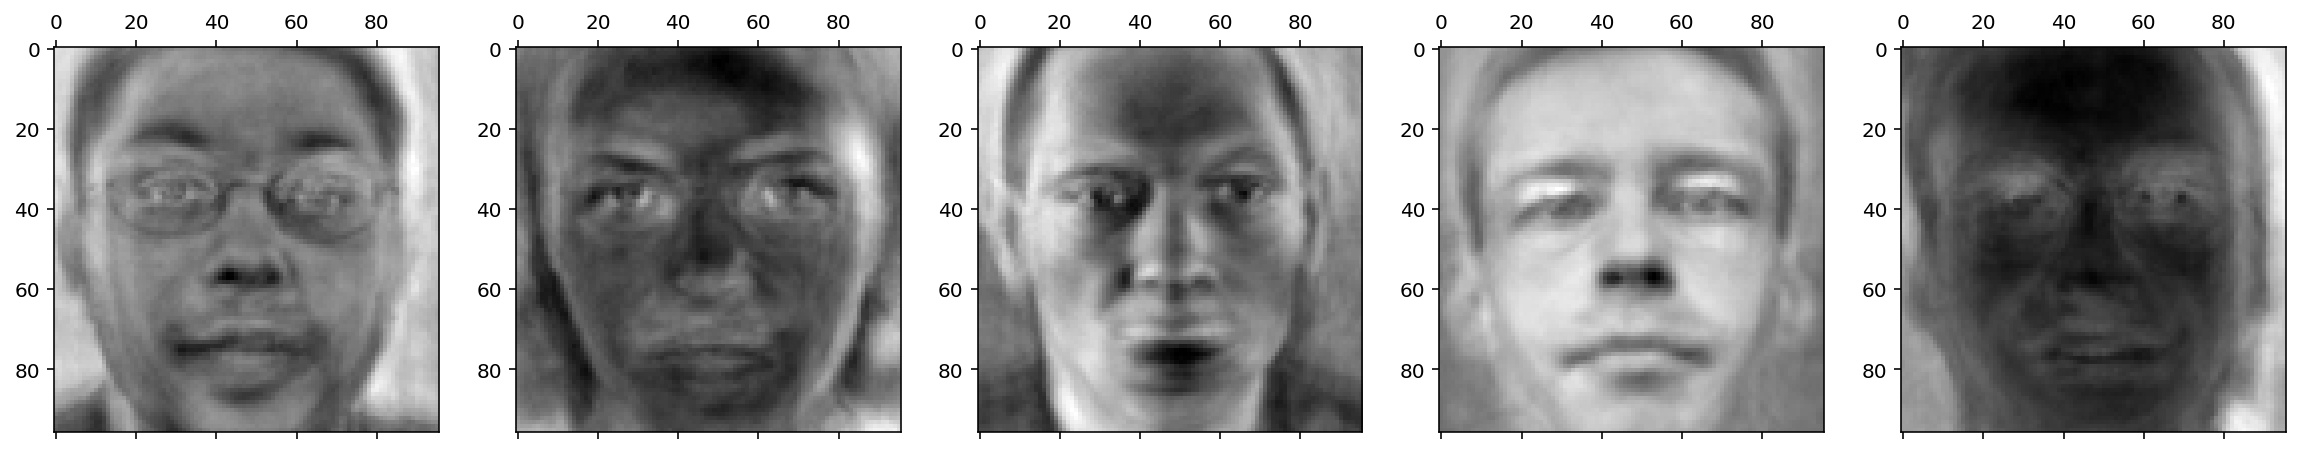

In [22]:
n=5
fig, ax = plt.subplots(1, n, figsize=(20, 4))
[ax[i].matshow(XP[i].reshape(96, -1), cmap='gray') for i in range(n)];


## **compare different components**

In [23]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    แสดง image ที่สร้างจาก pca ที่ n_components ต่าง ๆ กัน
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]
    
    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train
    
    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width)) for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full', 
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width)) for i in range(n_img)]

n_component = 10, (600, 10)
n_component = 110, (600, 110)
n_component = 210, (600, 210)
n_component = 310, (600, 310)
n_component = 410, (600, 410)


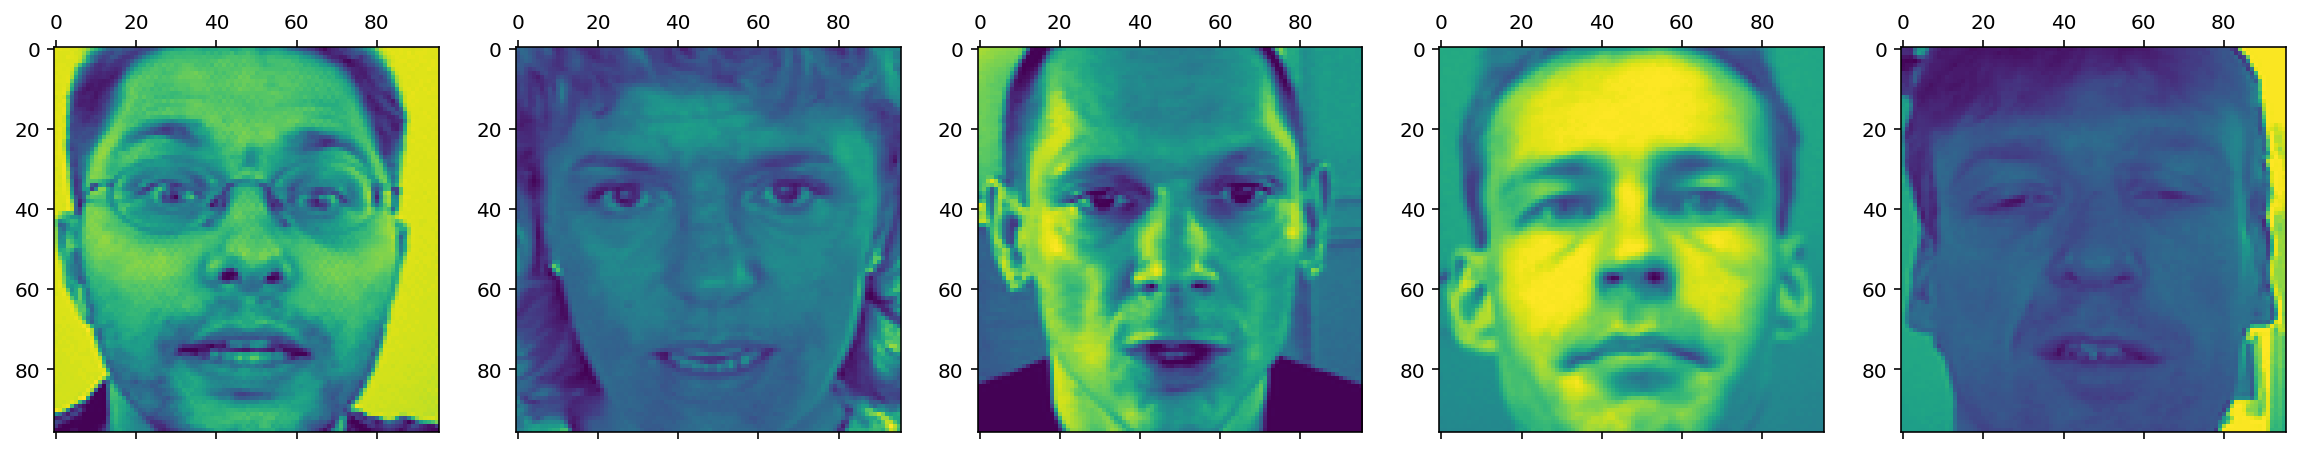

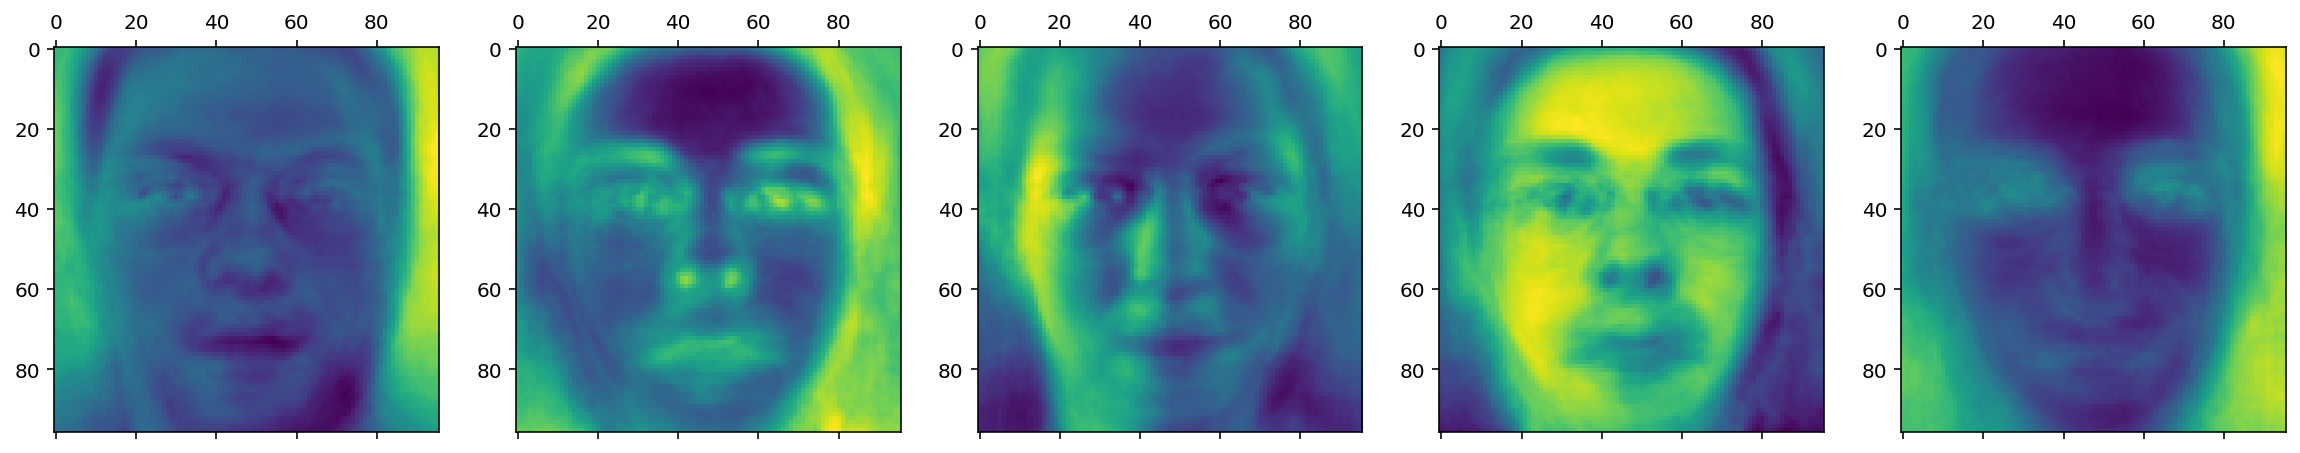

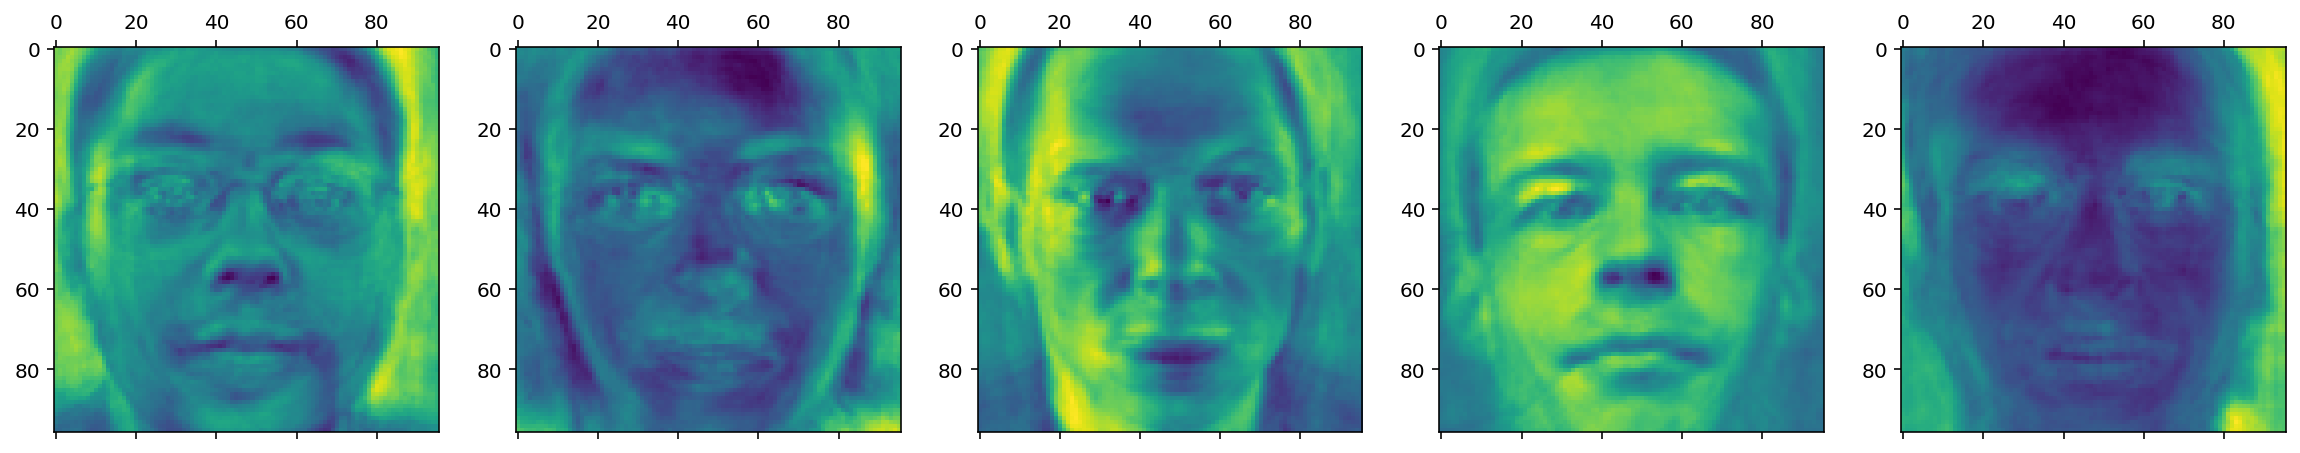

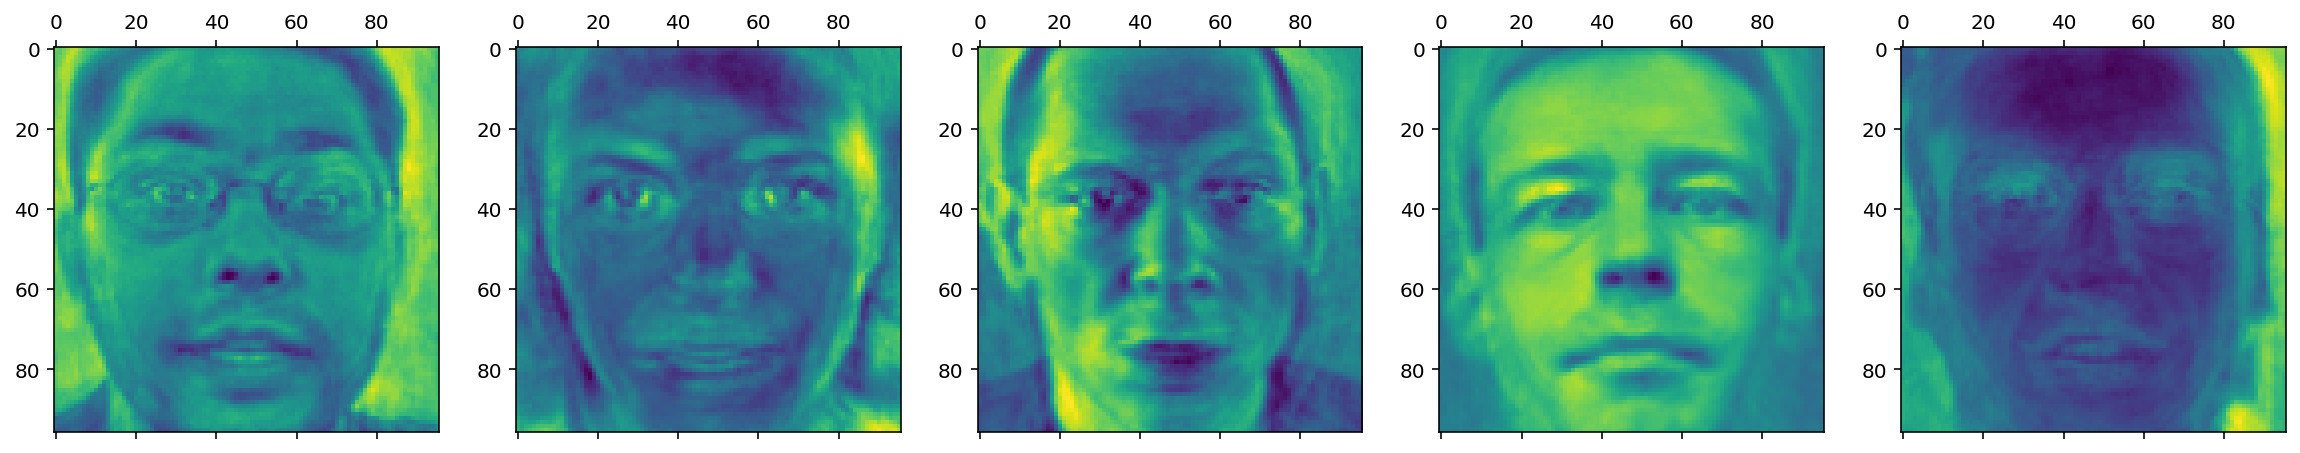

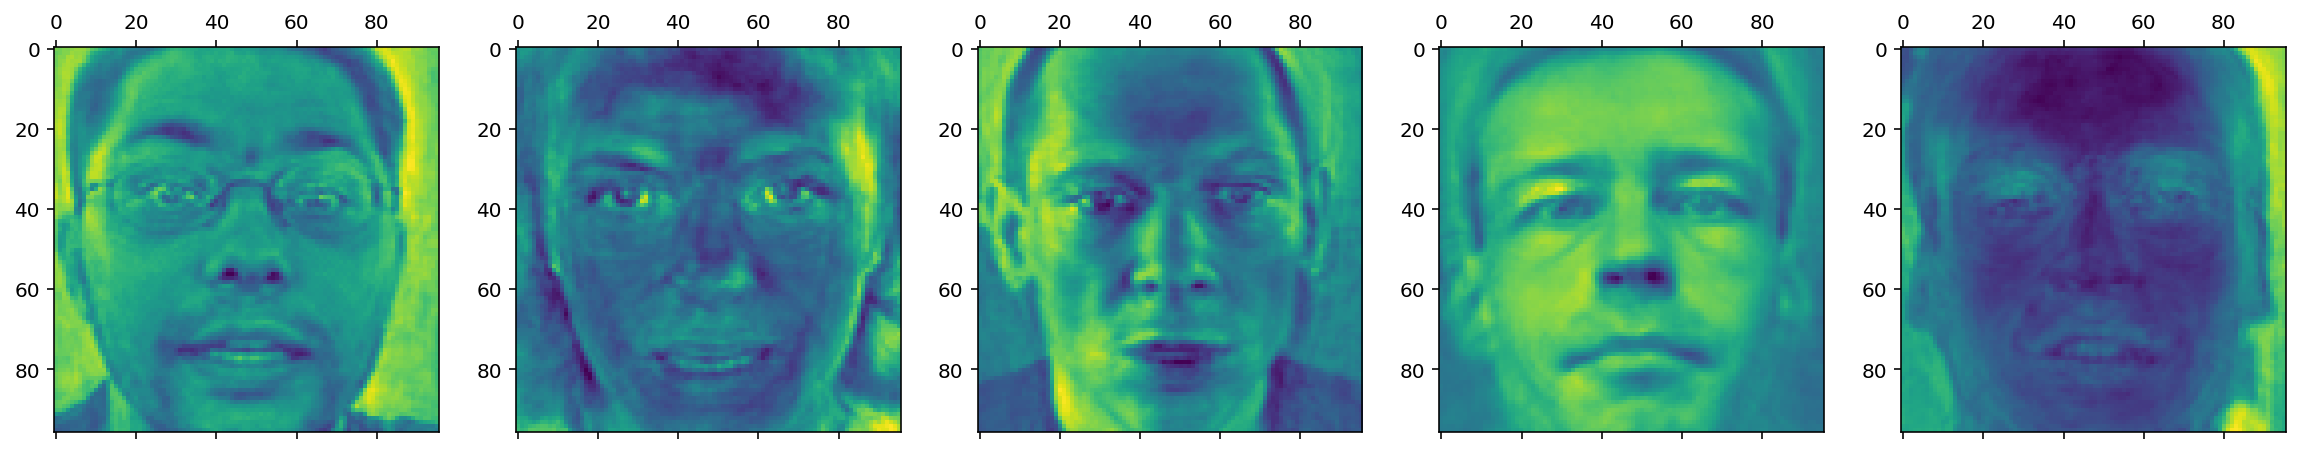

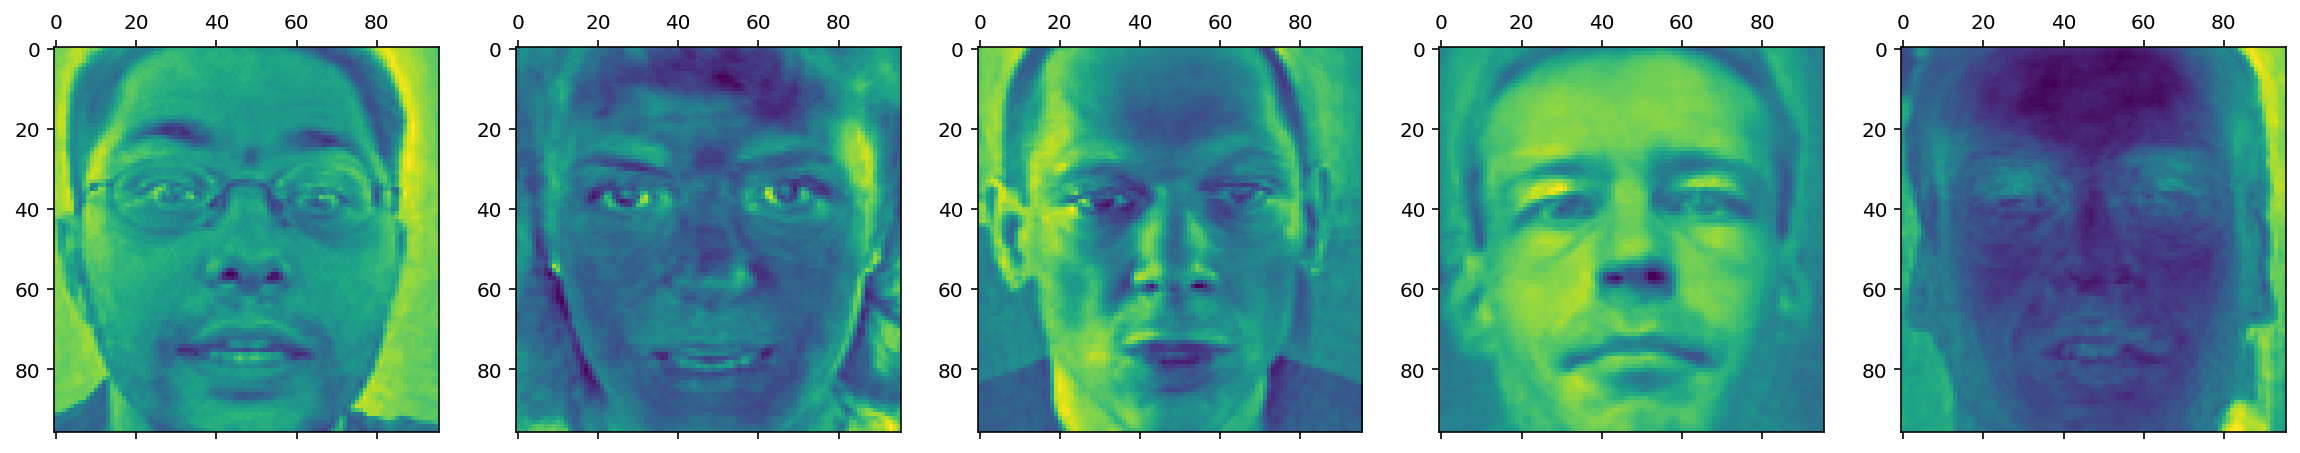

In [24]:
plot_varying_components(df[:600], 5, list(range(10, 501, 100)), img_shape=(96, 96))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])